# 📖 Chapter 4: Signal Filtering Basics


## 4.1 What is Filtering?

- **Filtering** is the process of modifying or removing certain parts of a signal.
- In audio, filters are used to:
    - Remove noise
    - Isolate certain frequency ranges
    - Enhance or suppress parts of the sound


## 4.2 Types of Filters

- **Low-Pass Filter (LPF)**
    - Passes **low frequencies**
    - Attenuates (reduces) **high frequencies**


- **High-Pass Filter (HPF)**
    - Passes **high frequencies.**
    - Attenuates **low frequencies.**


- **Band-Pass Filter (BPF)**
    - Passes a **specific range** of frequencies.
    - Attenuates frequencies outside the range.


**Summary:**
- LPF → keeps bass, removes hiss.
- HPF → keeps treble, removes rumble.
- BPF → isolates middle frequencies (e.g., voice band).


## 4.3 Convolution in Signal Processing
- **Convolution** = mathematical operation that combines two signals.
- In filtering:
    - One signal = the input audio.
    - Other signal = the filter kernel (impulse response).
- Convolution blends the filter characteristics into the signal.

**Simple View:**
- Think of convolution as "smearing" the signal using a special pattern (the filter).

## 4.4 FIR and IIR Filters

- **FIR (Finite Impulse Response):**
    - Filter output depends **only on current and past inputs.**
    - Always stable.
    - Easier to design.
    - Example: simple moving average filter.

- **IIR (Infinite Impulse Response):**
    - Filter output depends on **current input and past outputs.**
    - Can be unstable if not carefully designed.
    - More efficient (requires fewer coefficients).

## 4.5 Designing Basic Filters in Python

We use the ``scipy.signal`` library to design filters:
- ``butter`` → Butterworth filter design (smooth response)
- ``lfilter`` → Apply a filter to a signal
- ``firwin`` → Create FIR filter coefficients

# 📌 Example: Designing a Low-Pass Filter

In [1]:
from scipy.signal import butter, lfilter

# Design Butterworth low-pass filter
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs  # Nyquist frequency
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# Apply filter
def lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

## Let's Prepare Out Data:

- Two signals of frequency 300Hz and 3000Hz
- Sampling Rate of 44100Hz

In [2]:
import numpy as np

# Sampling parameters
sampling_rate = 120  # Hz
duration = 2.0         # seconds

# Time vector
t = np.linspace(0., duration, int(sampling_rate * duration), endpoint=False)

# Generate low frequency (300 Hz) sine wave
low_freq = 60  # Hz
low_freq_wave = 0.5 * np.sin(2 * np.pi * low_freq * t)

# Generate high frequency (100 Hz) sine wave
high_freq = 30  # Hz
high_freq_wave = 0.5 * np.sin(2 * np.pi * high_freq * t)

# Combine both to create a mixed signal
data = low_freq_wave + high_freq_wave

# Now 'data' and 'sampling_rate' are ready to use!


## 📌 Example: Designing a FIR Filter

In [3]:
from scipy.signal import firwin

# Create FIR low-pass filter coefficients
numtaps = 101  # number of taps (filter size)
cutoff = 40  # Hz
fs = sampling_rate  # Sampling frequency

fir_coeff = firwin(numtaps, cutoff, fs=fs)

# Apply FIR filter
filtered_data = lfilter(fir_coeff, 1.0, data)

# 🧪 Practical Exercises

## 📌 Exercise 1: Apply Low-Pass Filter to Remove High-Frequency Noise

In [4]:
# Set cutoff frequency
cutoff_frequency = 40  # Hz

# Apply low-pass filter
filtered_signal = lowpass_filter(data, cutoff_frequency, sampling_rate, order=6)

## 📌 Exercise 2: Visualize Before and After Filtering

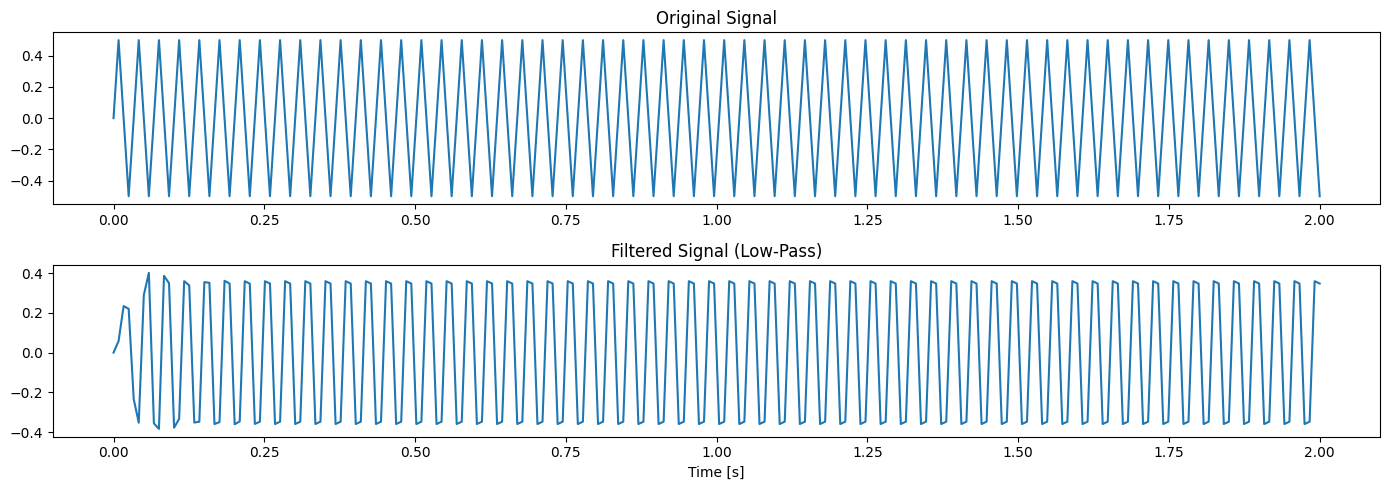

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Time axis
duration = len(data) / sampling_rate
t = np.linspace(0., duration, len(data))

# Plot
plt.figure(figsize=(14, 5))

plt.subplot(2, 1, 1)
plt.plot(t, data)
plt.title('Original Signal')

plt.subplot(2, 1, 2)
plt.plot(t, filtered_signal)
plt.title('Filtered Signal (Low-Pass)')

plt.xlabel('Time [s]')
plt.tight_layout()
plt.show()


**Note that lesser is the frequency of sine wave lesser is the compactness of signal.**

# 🧪 Expanded Practical Exercises

## 📌 Setup: Generate Synthetic Audio Data

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Sampling parameters
sampling_rate = 44100  # Hz
duration = 2.0         # seconds
t = np.linspace(0., duration, int(sampling_rate * duration), endpoint=False)

# Generate a mixed signal (low + high frequency)
low_freq_wave = 0.5 * np.sin(2 * np.pi * 300 * t)    # 300 Hz
high_freq_wave = 0.5 * np.sin(2 * np.pi * 3000 * t)  # 3000 Hz
data = low_freq_wave + high_freq_wave

print("Synthetic data generated!")


Synthetic data generated!


## 📌 Helper Functions: Plot Time and Frequency Domain

In [7]:
from scipy.fft import fft, fftfreq

# Plot time domain
def plot_time(signal, title, sampling_rate):
    t = np.linspace(0., len(signal) / sampling_rate, len(signal))
    plt.figure(figsize=(12, 3))
    plt.plot(t, signal)
    plt.title(title)
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.show()

# Plot frequency domain
def plot_frequency(signal, title, sampling_rate):
    N = len(signal)
    yf = fft(signal)
    xf = fftfreq(N, 1 / sampling_rate)
    
    plt.figure(figsize=(12, 3))
    plt.plot(xf[:N//2], 2.0/N * np.abs(yf[:N//2]))
    plt.title(title)
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Magnitude')
    plt.grid()
    plt.show()


# 🎯 Filters

## 📌 1. Low-Pass Filter (Butterworth)
- Sampling Rate = 1000
- Two signals of freqency 30 and 40Hz
- We apply low pass filter ot 35Hz Cutoff

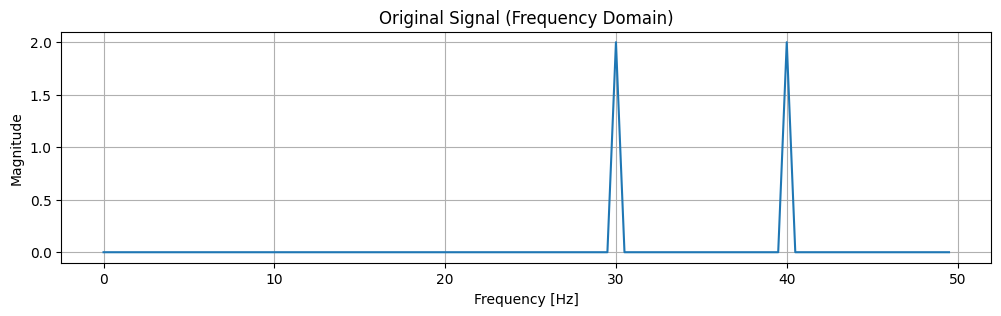

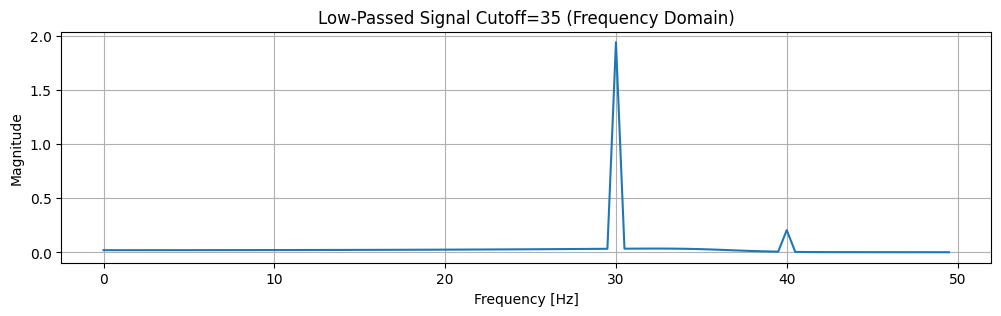

In [8]:
from scipy.signal import butter, lfilter

sampling_rate = 100

t = t = np.linspace(0., duration, int(sampling_rate * duration), endpoint=False)

data = 2 * np.sin(2 * np.pi * 30 * t) +  2 * np.sin(2 * np.pi * 40 * t)

# Design Low-Pass Butterworth Filter
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def apply_filter(data, b, a):
    return lfilter(b, a, data)

# Apply Low-Pass Filter
cutoff_lp = 35  # Hz
b_lp, a_lp = butter_lowpass(cutoff_lp, sampling_rate)
lowpassed_signal = apply_filter(data, b_lp, a_lp)

# Visualizations
plot_frequency(data, "Original Signal (Frequency Domain)", sampling_rate)
plot_frequency(lowpassed_signal, "Low-Passed Signal Cutoff=35 (Frequency Domain)", sampling_rate)

# 📌 2. High-Pass Filter (Butterworth)
- Sampling Rate = 1000
- Two signals of freqency 30 and 40Hz
- We apply high pass filter otf 35Hz

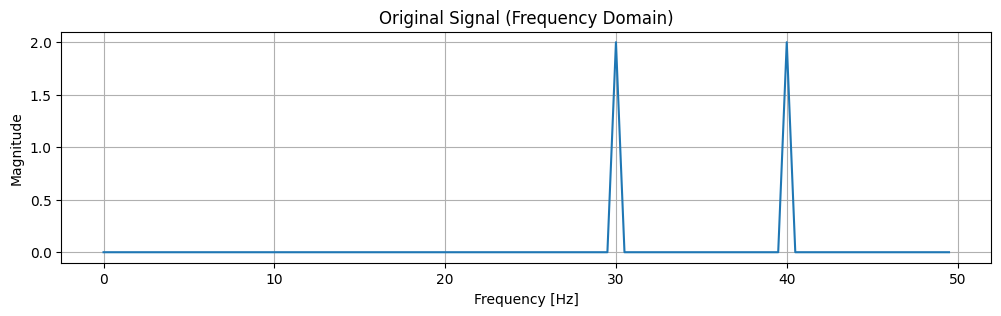

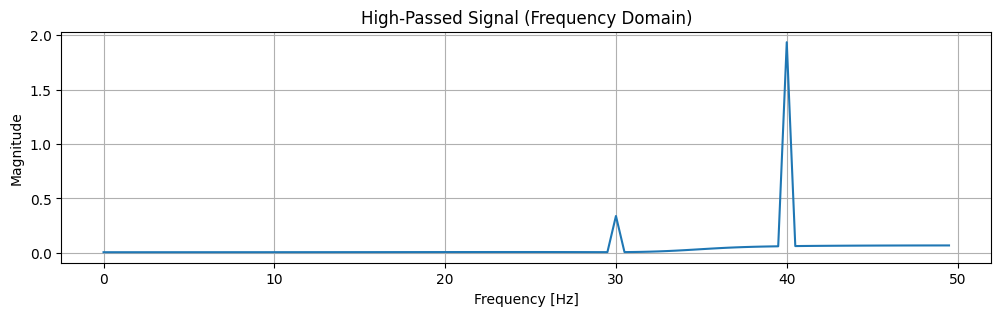

In [9]:
sampling_rate = 100

t = t = np.linspace(0., duration, int(sampling_rate * duration), endpoint=False)

data = 2 * np.sin(2 * np.pi * 30 * t) +  2 * np.sin(2 * np.pi * 40 * t)

# Design High-Pass Butterworth Filter
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

# Apply High-Pass Filter
cutoff_hp = 35  # Hz
b_hp, a_hp = butter_highpass(cutoff_hp, sampling_rate)
highpassed_signal = apply_filter(data, b_hp, a_hp)

# Visualizations
plot_frequency(data, "Original Signal (Frequency Domain)", sampling_rate)
plot_frequency(highpassed_signal, "High-Passed Signal (Frequency Domain)", sampling_rate)

## 📌 3. Band-Pass Filter (Butterworth)
- Sampling Rate = 1000
- Thee signals of freqency 25hz and 28hz 35hz
- We apply band pass filter (lp=20Hz, hp=30Hz)

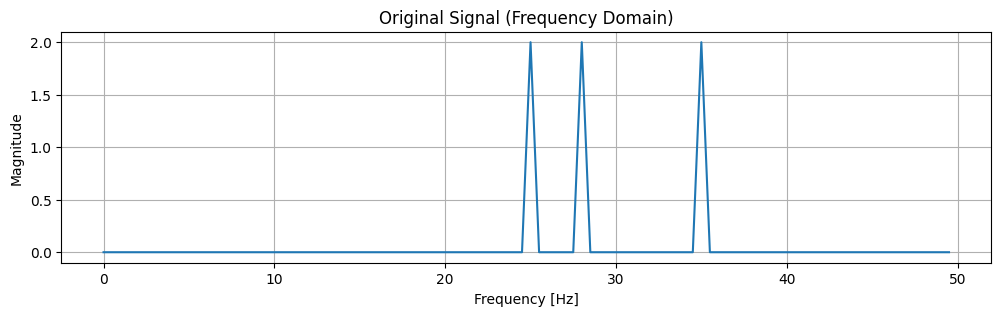

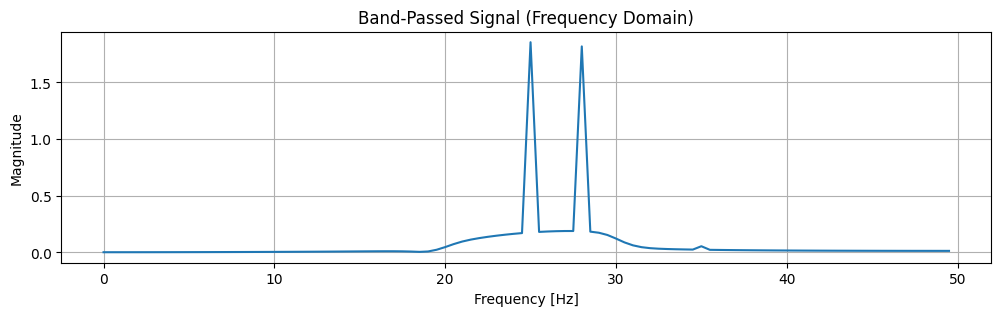

In [10]:
sampling_rate = 100

t = t = np.linspace(0., duration, int(sampling_rate * duration), endpoint=False)

data = 2 * np.sin(2 * np.pi * 25 * t) +  2 * np.sin(2 * np.pi * 28 * t) + 2 * np.sin(2 * np.pi * 35 * t)

# Design Band-Pass Butterworth Filter
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Apply Band-Pass Filter
lowcut = 20  # Hz
highcut = 30  # Hz
b_bp, a_bp = butter_bandpass(lowcut, highcut, sampling_rate)
bandpassed_signal = apply_filter(data, b_bp, a_bp)

# Visualizations
plot_frequency(data, "Original Signal (Frequency Domain)", sampling_rate)
plot_frequency(bandpassed_signal, "Band-Passed Signal (Frequency Domain)", sampling_rate)


## 🧹 Extra: FIR Low-Pass Filter Example (Using firwin)
- 3 signals of 20, 30 and 40Hz
- We apply low pass filter of 22kHz so 20 should pass as it is
- Experiment with the values of lfilter params
- numtaps for firwin

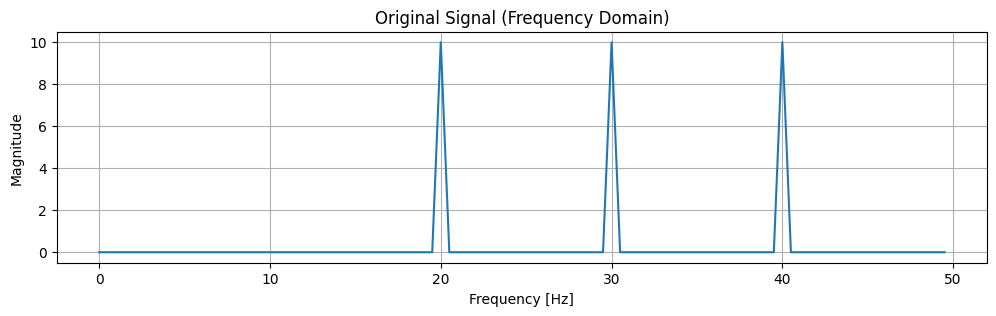

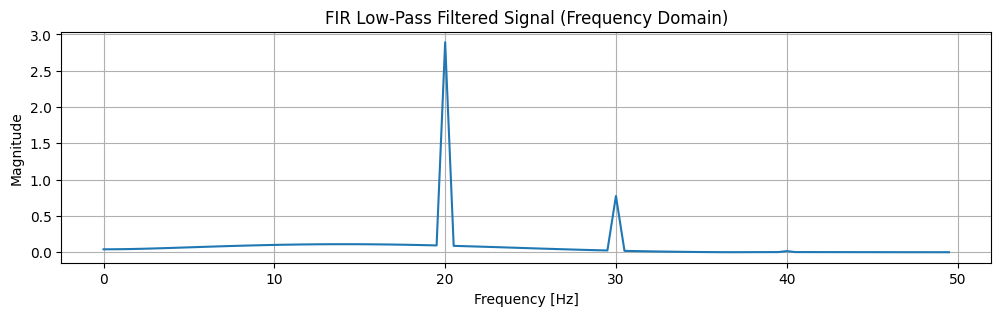

In [11]:
from scipy.signal import firwin

sampling_rate = 100

t = t = np.linspace(0., duration, int(sampling_rate * duration), endpoint=False)

data = 10 * np.sin(2 * np.pi * 20 * t) +  10 * np.sin(2 * np.pi * 30 * t) + 10 * np.sin(2 * np.pi * 40 * t)

# FIR Low-Pass Filter Design
cutoff = 22
numtaps = 10
fir_coeff = firwin(numtaps, cutoff, fs=sampling_rate)
fir_filtered = lfilter(fir_coeff, 2, data)

# Visualizations
plot_frequency(data, "Original Signal (Frequency Domain)", sampling_rate)
plot_frequency(fir_filtered, "FIR Low-Pass Filtered Signal (Frequency Domain)", sampling_rate)

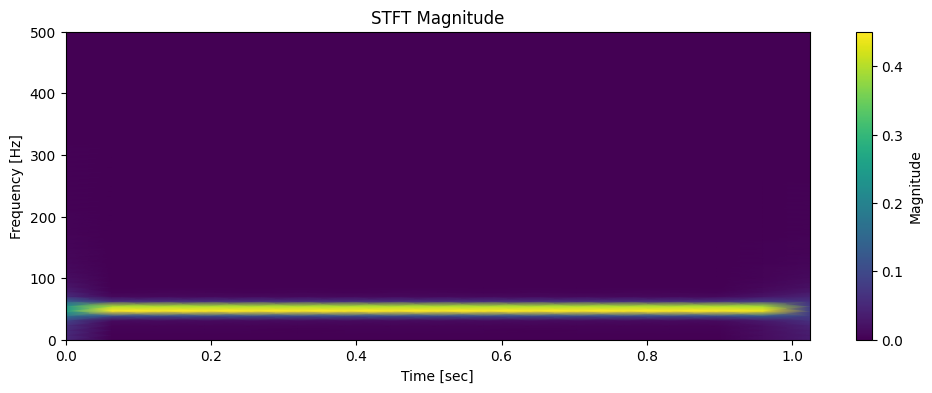

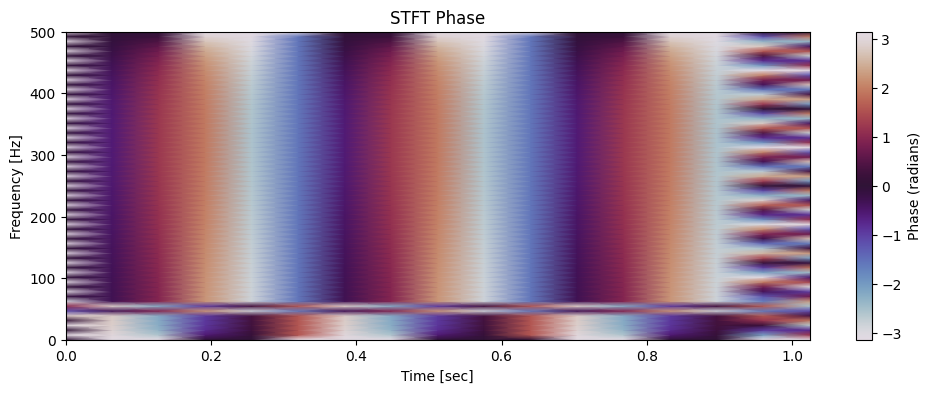

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft

# Generate a sine wave
fs = 1000  # sampling frequency
t = np.linspace(0, 1.0, fs, endpoint=False)
signal = np.sin(2 * np.pi * 50 * t)  # 50 Hz sine wave

# Compute STFT
f, t_stft, Zxx = stft(signal, fs, nperseg=128)

# Magnitude and Phase
magnitude = np.abs(Zxx)
phase = np.angle(Zxx)

# Plot magnitude spectrogram
plt.figure(figsize=(12, 4))
plt.pcolormesh(t_stft, f, magnitude, shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(label='Magnitude')
plt.show()

# Plot phase spectrogram
plt.figure(figsize=(12, 4))
plt.pcolormesh(t_stft, f, phase, shading='gouraud', cmap='twilight')
plt.title('STFT Phase')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(label='Phase (radians)')
plt.show()